# Bikesharing Data Exploration

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

This document explores two datasets containing data regarding the bikesharing systems in the San Francisco and the Boston area. Each dataset contains approximately 2.5 mio. observations about rental bike utilization within the year 2019.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import requests
import zipfile
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling
Subsequently the Data Wrangling for the bike sharing data is performed. As this process step is not the focus of this project, the subsequent explanations will be minimal.

### a. Gather

#### I. Download project bikesharing data for San Francisco area programmatically

In [2]:
# List with ziped file urls for San Francisco data
url_list = ['https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
            'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip']

# To be created folder name
folder_name = 'bikeshare_SF'

In [3]:
# Create folder for San Francisco data
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

exceptions_list = []
    
# Download zip files from urls and unzip them in project folder
for url in url_list:
    response = requests.get(url)
    
    try:
        with open(os.path.join(folder_name, url.split('/')[4]), mode = 'wb') as file:
            file.write(response.content)

        file_name = url.split('/')[4]
        file_path = folder_name + '/' + file_name

        with zipfile.ZipFile(file_path, 'r') as myzip:
            myzip.extractall(folder_name)


    except Exception as e:
        exceptions_list.append(url)

#### II. Create reference model for overall dataframe

In [4]:
# Read first csv-file and create df_reference
url_reference = 'https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip'

path_zip = folder_name + '/' + url_reference.split('/')[4]
path_csv = path_zip.rstrip('.zip')

df_reference = pd.read_csv(path_csv)

Knowledge from visual inspection of csv-files and previous tries to create overall dataframe:
- columns 'rental_access_method' and 'bike_share_for_all_trip' exist in some, but not all csv-files
- column 'user_type' within some of the csv-files causes problems when joining dataframes

**-> Removal of problematic columns from reference_model**

In [5]:
# Drop problemartic columns
df_reference.drop(['bike_share_for_all_trip'], axis = 1, inplace=True)

In [6]:
# Save columns from reference model in list 'columns_reference'
columns_reference = df_reference.columns

#### III. Join data from csv-files to single dataframe df

In [7]:
# Appending all refernce column to df
df = pd.DataFrame()

for url in url_list:
    path_zip = folder_name + '/' + url.split('/')[4]
    path_csv = path_zip.rstrip('.zip')
    
    # Importing dat from csv to df
    df_import = pd.read_csv(path_csv, dtype={'start_station_id': np.float32, 'start_station_latitude': np.float32, 
                                             'start_station_longitude':np.float32, 'end_station_id': np.float32, 
                                             'end_station_latitude': np.float32, 'end_station_longitude':np.float32,
                                             'user_type': 'category', 'bike_share_for_all_trip': 'category',
                                             'rental_access_method': 'category'})
    
    #Creating new help dataframe which only contains reference columns
    df_help = pd.DataFrame()
    
    for c in columns_reference:
        df_help[c] = df_import[c]
        
    # Appending dataframe with reference columns to df
    df = df.append(df_help, ignore_index = True, sort = False)

#### IV. Store dataframe df as csv-file

In [8]:
# Save df as csv-file in folder
df.to_csv('dataset_san_francisco.csv', index=False)

#### V. Download project bikesharing data for Boston area programmatically

In [9]:
# List with ziped file urls for Boston data
url_list = ['https://s3.amazonaws.com/hubway-data/201901-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201902-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201903-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201904-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201905-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201906-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201907-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201908-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201909-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201910-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201911-bluebikes-tripdata.zip',
            'https://s3.amazonaws.com/hubway-data/201912-bluebikes-tripdata.zip']

# To be created folder name
folder_name = 'bikeshare_BO'

In [10]:
# Create folder for Boston data
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

exceptions_list = []
    
# Download zip files from urls and unzip them in project folder
for url in url_list:
    response = requests.get(url)
    
    try:
        with open(os.path.join(folder_name, url.split('/')[4]), mode = 'wb') as file:
            file.write(response.content)

        file_name = url.split('/')[4]
        file_path = folder_name + '/' + file_name

        with zipfile.ZipFile(file_path, 'r') as myzip:
            myzip.extractall(folder_name)


    except Exception as e:
        exceptions_list.append(url)

Note: Following errors concerning the data have been noticed
- **'201906-bluebikes-tripdata.zip'** contained the csv file '201907-bluebikes-tripdata.csv' and has to be changed to '201906-bluebikes-tripdata.csv'
- **'201907-bluebikes-tripdata.zip'** contained a file without the ending **.csv** and has to be changed to '201907-bluebikes-tripdata.csv'
- **'201908-bluebikes-tripdata.zip'** contained a file without the ending **.csv** and has been changed manually to '201908-bluebikes-tripdata.csv'

In [11]:
# Resolving errors from programmatical download
# Error 1: Rename '201907-bluebikes-tripdata.csv' to '201906-bluebikes-tripdata.csv'
os.rename('bikeshare_BO/201907-bluebikes.tripdata.csv', 'bikeshare_BO/201906-bluebikes-tripdata.csv')

# Error 2: Rename '201907-bluebikes-tripdata' to '201907-bluebikes-tripdata.csv'
os.rename('bikeshare_BO/201907-bluebikes-tripdata', 'bikeshare_BO/201907-bluebikes-tripdata.csv')

# Error 3: Rename '201908-bluebikes-tripdata' to '201908-bluebikes-tripdata.csv'
os.rename('bikeshare_BO/201908-bluebikes-tripdata', 'bikeshare_BO/201908-bluebikes-tripdata.csv')

#### VI. Join data from csv-files to single dataframe df2

In [12]:
# Create new dataframe
df2 = pd.DataFrame()

# Append all data within csv_file to datframe
for url in url_list:
    path_zip = folder_name + '/' + url.split('/')[4]
    path_csv = path_zip.rstrip('.zip')
    path_csv = path_csv + '.csv'
    
    df_help = pd.read_csv(path_csv, dtype={'start station id': np.float32, 'start station latitude': np.float32,
                                           'start station longitude':np.float32, 'end station id': np.float32,
                                           'end station latitude': np.float32, 'end station longitude':np.float32,
                                           'usertype': 'category'}) 

    df2 = df2.append(df_help, ignore_index = True, sort = False)

#### VII. Store dataframe df as csv-file

In [13]:
# Save df as csv-file in folder
df2.to_csv('dataset_boston.csv', index=False)

### b. Assess
In order to sufficiently understand the data within the two datasets, the shape, rows and columns are examined.

#### I. Visual assessment of df

In [14]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213036,196.0,Grand Ave at Perkins St,37.808895,-122.256462,4861,Subscriber
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408913,134.0,Valencia St at 24th St,37.752426,-122.420631,5506,Subscriber
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870140,-122.268425,157.0,65th St at Hollis St,37.846783,-122.291374,2717,Customer
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770084,-122.429153,53.0,Grove St at Divisadero,37.775948,-122.437775,4557,Customer
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794128,-122.394432,28.0,The Embarcadero at Bryant St,37.787167,-122.388100,2100,Customer


#### II. Visual assessment of df2

In [21]:
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,371,2019-01-01 00:09:13.7980,2019-01-01 00:15:25.3360,80.0,MIT Stata Center at Vassar St / Main St,42.362133,-71.091156,179.0,MIT Vassar St,42.355602,-71.103943,3689,Subscriber,1987,1
1,264,2019-01-01 00:33:56.1820,2019-01-01 00:38:20.8800,117.0,Binney St / Sixth St,42.366161,-71.086884,189.0,Kendall T,42.362427,-71.084953,4142,Subscriber,1990,1
2,458,2019-01-01 00:41:54.6000,2019-01-01 00:49:33.2730,68.0,Central Square at Mass Ave / Essex St,42.365070,-71.103104,96.0,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111076,1628,Subscriber,1977,1
3,364,2019-01-01 00:43:32.5710,2019-01-01 00:49:37.4260,89.0,Harvard Law School at Mass Ave / Jarvis St,42.379009,-71.119942,334.0,Mass Ave at Hadley/Walden,42.391209,-71.122604,2969,Subscriber,1993,1
4,681,2019-01-01 00:49:56.4640,2019-01-01 01:01:17.7010,73.0,Harvard Square at Brattle St / Eliot St,42.373230,-71.120888,367.0,Vassal Lane at Tobin/VLUS,42.383934,-71.139610,3469,Subscriber,1979,2


#### III. Programatic assessment of df

In [16]:
# General information about columns, rows and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   duration_sec             int64   
 1   start_time               object  
 2   end_time                 object  
 3   start_station_id         float32 
 4   start_station_name       object  
 5   start_station_latitude   float32 
 6   start_station_longitude  float32 
 7   end_station_id           float32 
 8   end_station_name         object  
 9   end_station_latitude     float32 
 10  end_station_longitude    float32 
 11  bike_id                  int64   
 12  user_type                category
dtypes: category(1), float32(6), int64(2), object(4)
memory usage: 136.3+ MB


In [17]:
# Checking datatypes of columns (object columns)
for c in df.columns:
    print(c, ': ', type(df[c][0]))

duration_sec :  <class 'numpy.int64'>
start_time :  <class 'str'>
end_time :  <class 'str'>
start_station_id :  <class 'numpy.float32'>
start_station_name :  <class 'str'>
start_station_latitude :  <class 'numpy.float32'>
start_station_longitude :  <class 'numpy.float32'>
end_station_id :  <class 'numpy.float32'>
end_station_name :  <class 'str'>
end_station_latitude :  <class 'numpy.float32'>
end_station_longitude :  <class 'numpy.float32'>
bike_id :  <class 'numpy.int64'>
user_type :  <class 'str'>


In [18]:
# Checking one random sample from the dataframe
df.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
1100507,1738,2019-06-23 12:58:20.5580,2019-06-23 13:27:18.8060,6.0,The Embarcadero at Sansome St,37.804771,-122.403236,130.0,22nd St Caltrain Station,37.757706,-122.391884,821,Subscriber


In [19]:
# Calculating main values for column 'duration_sec' - too many rows to use function .describe()
print('mean:', df.duration_sec.mean().round(2), 'min: ', df.duration_sec.min(), 'max: ', df.duration_sec.max())

mean: 807.65 min:  60 max:  912110


#### IV. Programatic assessment of df2

In [23]:
# Checking datatypes of columns (object columns)
for c in df2.columns:
    print(c, ': ', type(df2[c][0]))

tripduration :  <class 'numpy.int64'>
starttime :  <class 'str'>
stoptime :  <class 'str'>
start station id :  <class 'numpy.float32'>
start station name :  <class 'str'>
start station latitude :  <class 'numpy.float32'>
start station longitude :  <class 'numpy.float32'>
end station id :  <class 'numpy.float32'>
end station name :  <class 'str'>
end station latitude :  <class 'numpy.float32'>
end station longitude :  <class 'numpy.float32'>
bikeid :  <class 'numpy.int64'>
usertype :  <class 'str'>
birth year :  <class 'numpy.int64'>
gender :  <class 'numpy.int64'>


In [24]:
# Calculating main values for column 'tripduration' - too many rows to use function .describe()
print('mean:', df2.tripduration.mean().round(2), 'min: ', df2.tripduration.min(), 'max: ', df2.tripduration.max())

mean: 1471.83 min:  61 max:  3581049


#### Tidiness of data
##### `df2`
- Column names of df2 don't match with column names from df -> Rename column names


#### Quality of data
##### `df`
- Removal of null-values from the dataframe df
- Column 'start_time' to type datetime
- Column 'end_time to type datetime
- Column 'start_station_id' to type 'int'
- Column 'end_station_id' to type 'int'

##### `df2`
- Removal of null-alues from dataframe df2
- Removal of columns 'birth year' and 'gender' which have no counterpart in df
- Column 'starttime' to type datetime
- Column 'stoptime to type datetime

### c. Clean
In the Cleaning phase potential problems in the provided dataset are idtentified and subsequently solved. The data is brought into a state from which further analysis can be conducted.

#### I. Clean df

In [10]:
# Create df_clean from csv-file
df_clean = pd.read_csv('dataset_san_francisco.csv', dtype={'start_station_id': np.float32, 'start_station_latitude': np.float32, 
                                             'start_station_longitude':np.float32, 'end_station_id': np.float32, 
                                             'end_station_latitude': np.float32, 'end_station_longitude':np.float32,
                                             'user_type': 'category', 'bike_share_for_all_trip': 'category',
                                             'rental_access_method': 'category'})

##### Define
##### `df_clean`
- Removal of null-values from the dataframe df
- Column 'start_time' to type datetime
- Column 'end_time to type datetime
- Column 'start_station_id' to type 'int'
- Column 'end_station_id' to type 'int'

##### Code

In [11]:
# Removal of null-values from df
df_clean.dropna(inplace=True)

In [12]:
# Changing columns 'start_time' and 'endtime' to type 'datetime'
columns_datetime = ['start_time', 'end_time']

for c in columns_datetime:
    df_clean[c] = pd.to_datetime(df_clean[c])

In [13]:
# Changing columns 'start_station_id' and 'end_station_id' to type 'int'
columns_int = ['start_station_id', 'end_station_id']

for c in columns_int:
    df_clean[c] = df_clean[c].astype(int)

##### Check

In [14]:
# Any null-values left in dataframe?
df_clean.isnull().sum().any()

False

In [15]:
# Check datatypes of columns
columns_changed = columns_datetime + columns_int

for c in columns_changed:
    print(c, ':', type(df_clean[c][0]))

start_time : <class 'pandas._libs.tslibs.timestamps.Timestamp'>
end_time : <class 'pandas._libs.tslibs.timestamps.Timestamp'>
start_station_id : <class 'numpy.int32'>
end_station_id : <class 'numpy.int32'>


#### II. Store df_clean

In [16]:
# Storing df_clean as csv-file
df_clean.to_csv('dataset_san_francisco_clean.csv', index=False)

#### III. Clean df2

In [17]:
# Create df2_clean from csv-file
df2_clean = pd.read_csv('dataset_boston.csv', dtype={'start station id': np.float32, 'start station latitude': np.float32,
                                           'start station longitude':np.float32, 'end station id': np.float32,
                                           'end station latitude': np.float32, 'end station longitude':np.float32,
                                           'usertype': 'category'})

##### Define
##### `df2_clean`
- Removal of columns 'birth year' and 'gender' which have no counterpart in df
- Column names of df2 don't match with column names from df -> Rename column names
- Removal of null-alues from dataframe df2
- Column 'starttime' to type datetime
- Column 'stoptime' to type datetime

##### Code

In [18]:
# Droping columns without counterpart in df2_clean
df2_clean.drop(['birth year', 'gender'], axis=1, inplace=True)

In [19]:
# Extracting column names from df_clean
column_labels_new = ['duration_sec','start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude',
                     'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude',
                     'end_station_longitude', 'bike_id', 'user_type']

# Renaming column names of df2_clean
df2_clean.columns = column_labels_new

In [20]:
# Droping rows with null-values from dataframe
df2_clean.dropna(inplace = True)

In [21]:
# Changing columns 'start_time' and 'endtime' to type 'datetime'
columns_datetime = ['start_time', 'end_time']

for c in columns_datetime:
    df2_clean[c] = pd.to_datetime(df2_clean[c])

##### Check

In [22]:
# Any null-values left in dataframe?
df2_clean.isnull().sum().any()

False

In [23]:
# Check datatypes of columns
columns_changed = columns_datetime

for c in columns_changed:
    print(c, ':', type(df2_clean[c][0]))

start_time : <class 'pandas._libs.tslibs.timestamps.Timestamp'>
end_time : <class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### IV. Store df2_clean

In [24]:
# Save df2_clean as csv-file in folder
df2_clean.to_csv('dataset_boston_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis
As the Explanatory analysis is the core piece of this project, the following steps will be explained in detail. As data for the bike sharing system in San Francisco as well as the bike sharing system in the Boston area have been provided, the focus of the analysis will be on similarities and differences between these datasets.

In [25]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522537 entries, 0 to 2522536
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float32       
 4   start_station_name       object        
 5   start_station_latitude   float32       
 6   start_station_longitude  float32       
 7   end_station_id           float32       
 8   end_station_name         object        
 9   end_station_latitude     float32       
 10  end_station_longitude    float32       
 11  bike_id                  int64         
 12  user_type                category      
dtypes: category(1), datetime64[ns](2), float32(6), int64(2), object(2)
memory usage: 175.6+ MB


### I. What is the structure of this dataset?
The dataset for the bike rental system in the San Francisco area contains 2,407,259 observations and the dataset for the bikesharing system in Boston contains 2,522,537 observations. Each observation is the activity of a user who is accessing a rental bicycle at a specific station and returning it at the same or at another station of the bike sharing system. Due to the efforts in the cleaning phase of this project the structure of both datasets is identical.

Variables within the datasets:
- **'start_time', 'end_time':** mark the start and end of a rental activity
- **'duration_sec'**: the time difference between start and end of a rental activity in seconds
- **'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude':** Identificational as well as geographical information about the system station the bike has been taken from and brought back to
- **'bike_id'**: Unique identification number of a bicycle within the bike rental system
- **'user_type'**: Classifies the person who performs a rental activity. Can either be a **Customer** (annual membership) or a **Subscriber** (day or multiple day pass)

### II. What are the main features of interest within this dataset?
As I want to identifiy similarities and differences within the bike sharing systems in San Francisco and Boston the focus of the analysis will be on the characteristics 'duration_sec', 'start_time' and 'user_type' which allow a comparison of the data within the two datasets.

### III. Exploration of bike utilization duration

In [26]:
# Checking main values for column 'duration_sec' for Boston area
df_clean.duration_sec.describe()

count    2.407259e+06
mean     8.048171e+02
std      1.910718e+03
min      6.000000e+01
25%      3.580000e+02
50%      5.690000e+02
75%      8.830000e+02
max      8.623000e+04
Name: duration_sec, dtype: float64

In [27]:
# Checking main values for column 'duration_sec' for Boston area
df2_clean.duration_sec.describe()

count    2.522537e+06
mean     1.471834e+03
std      2.190802e+04
min      6.100000e+01
25%      4.180000e+02
50%      7.070000e+02
75%      1.185000e+03
max      3.581049e+06
Name: duration_sec, dtype: float64

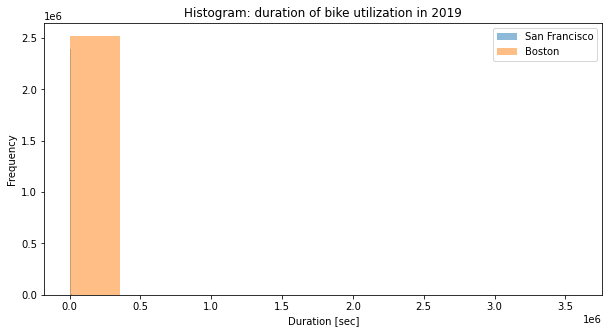

In [28]:
# Visual comparison of 'duration_sec' for San Francisco and Boston area
plt.figure(figsize = [10,5])

plt.hist(data=df_clean, x = 'duration_sec', alpha=.5)
plt.hist(data=df2_clean, x = 'duration_sec', alpha=.5)

plt.title('Histogram: duration of bike utilization in 2019')
plt.legend(['San Francisco', 'Boston'])
plt.xlabel('Duration [sec]')
plt.ylabel('Frequency')
plt.xticks(rotation= 0);

The first attempt of comparing the frequency of bike utilization for the system in San Francisco and Boston visually via a histogram didn't work. The automatic bin size within the histogram is too large to differentiate between the durations within the datasets. There are few very long durations which make it additionally hard to analyze the differences between the two dataset. For the next visualization attempt the bin sized will be reduzed and the only observations with a duration <7200 sec (2 hours) will be plotted.

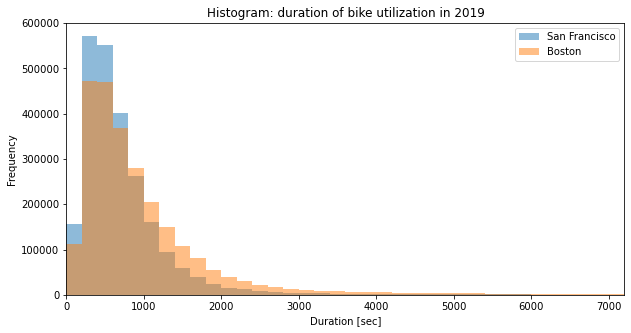

In [29]:
# Visual comparison of 'duration_sec' for San Francisco and Boston area with x axis limited from 0 to 7200sec (==2h)
plt.figure(figsize = [10,5])
bin_edges = np.arange(0, df_clean['duration_sec'].max()+5, 200)

plt.hist(data=df_clean, x = 'duration_sec', bins=bin_edges, alpha=.5)
plt.hist(data=df2_clean, x = 'duration_sec', bins=bin_edges, alpha=.5)

plt.title('Histogram: duration of bike utilization in 2019')
plt.legend(['San Francisco', 'Boston'])
plt.ylabel('Frequency')
plt.xlabel('Duration [sec]')
plt.xlim(0, 7200);
plt.xticks(rotation= 0);

Within this histogram you can see that in the San Francisco bike sharing system more rental acitivites with a duration <800 sec have been recoreded than within the Boston system. However from a duration of 800 sec on observations are more frequent in the Boston bike share system data. We have to be careful with interpretations as we are comparing the absolute data from both systems, but as there were about 100,000 observations more within the Boston dataset it seems likely that rental bike users in San Francisco used their bikes in general more often for shorter durations than in Boston.

In [30]:
# Calculating mean duration of a trip
duration_mean_sf = df_clean.duration_sec.mean()
duration_mean_bo = df2_clean.duration_sec.mean()
duration_mean = [duration_mean_sf, duration_mean_bo]

In [31]:
# Creating dataframe for visualization purposes
df_duration = pd.DataFrame()

# Adding columns
df_duration = df_duration.append(duration_mean)

# Transpose df_duration
df_duration = df_duration.transpose()

# Renaming columns
labels_new = ['San Francisco', 'Boston']
df_duration.columns = labels_new

# Setting index
df_duration['index'] = ['']

In [32]:
# Checking df duration before creating plot
df_duration

,San Francisco,Boston,index
0,804.817123,1471.833556,


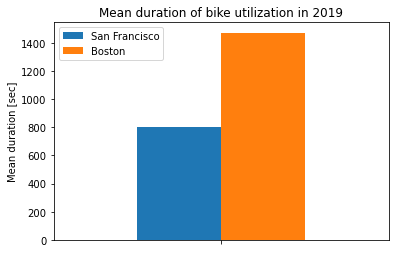

In [33]:
# Plotting graph for mean duration of bike utilization
df_duration.set_index('index').plot(kind='bar')
plt.title('Mean duration of bike utilization in 2019')
plt.xlabel('')
plt.ylabel('Mean duration [sec]')
plt.xticks(rotation= 0);

The bar graph with the mean values for duration of bike utilization confirms the assumption that users in San Francisco used their rental bikes in 2019 in average for shorter durations (804.8 sec) than users did in the Boston area (1471 sec).

### IV. Exploration of peaks in utilization throughout the year

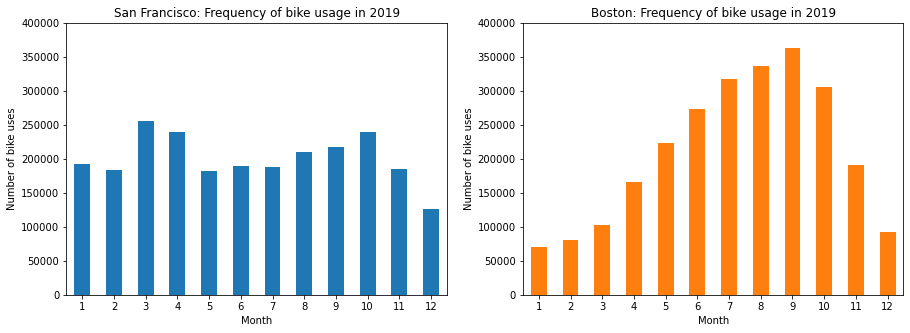

In [34]:
# Making sure column 'start_time' is in format 'datetime'
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df2_clean['start_time'] = pd.to_datetime(df2_clean['start_time'])

# Print histogram for bike usage in 2019
plt.figure(figsize = [15,5])
base_color = sb.color_palette()[1]

# Printing subplot #1
plt.subplot(1, 2, 1)
df_clean['start_time'].groupby(df_clean['start_time'].dt.month).count().plot(kind='bar')
plt.title('San Francisco: Frequency of bike usage in 2019')
plt.xlabel('Month')
plt.ylabel('Number of bike uses')
plt.ylim(0, 400000)
plt.xticks(rotation= 0)

# Printing subplot #2
plt.subplot(1, 2, 2)
df2_clean['start_time'].groupby(df2_clean['start_time'].dt.month).count().plot(kind='bar', color = base_color)
plt.title('Boston: Frequency of bike usage in 2019')
plt.xlabel('Month')
plt.ylabel('Number of bike uses')
plt.ylim(0, 400000)
plt.xticks(rotation= 0);

The two graphs show the frequency of bike uses for the San Francisco (blue, left side) and Boston system (orange, right side) within the year 2019. The graph with the San Francisco data shows a minimal value (<150,000) in december, whilst peaking in march, april, and october (all >230.000). In Boston the bike uses for 2019 show low values (<100,000) for the months january and february then increase gradually until they peak in September (>350,000) and then drop again until the end of the year. 

The differences in bike usage for the two datasets can mainly be explained by the different climatic conditions in San Francisco and Boston. San Francisco is located on the West Coast of the US which has a more moderate climate than Boston at the East Coast. Whilst locals and tourists find suitable cycling conditions in San Francisco throughout the whole year, people in Boston are way less likely to rent a bike during the cold winter months.

### V. Exploration of user types

In [35]:
# Observing column 'user_type' for df_clean
df_clean.user_type.value_counts()

Subscriber    1935042
Customer       472217
Name: user_type, dtype: int64

In [36]:
# Observing column 'user_type' for df2_clean
df2_clean.user_type.value_counts()

Subscriber    1988467
Customer       534070
Name: user_type, dtype: int64

In [37]:
# Calculating total uses of bicycles
uses_sf = df_clean.user_type.count()
uses_bo = df2_clean.user_type.count()
users_total = {'San Francisco':uses_sf, 'Boston':uses_bo}

# Calculating user_types and number of uses
user_types_sf = df_clean.user_type.value_counts()
user_types_bo = df2_clean.user_type.value_counts()

In [38]:
# Creating dataframe for visualization purposes
comp_user_types = pd.DataFrame()

# Adding calculated data to new df
comp_user_types['San Francisco'] = user_types_sf
comp_user_types['Boston'] = user_types_bo

comp_user_types = comp_user_types.append(users_total, ignore_index=True)

# Transpose comp_user_types
comp_user_types = comp_user_types.transpose()

# Renaming columns
labels_new = ['Subscriber', 'Customer', 'Total']
comp_user_types.columns = labels_new

# Changing sequence of columns
comp_user_types = comp_user_types[['Total', 'Subscriber', 'Customer']]

# Transpose comp_user_types
comp_user_types = comp_user_types.transpose()

# Creating column 'index' with index labels
comp_user_types['index'] = comp_user_types.index

In [39]:
# Checking dataframe before plotting chart
comp_user_types

,San Francisco,Boston,index
Total,2407259,2522537,Total
Subscriber,1935042,1988467,Subscriber
Customer,472217,534070,Customer


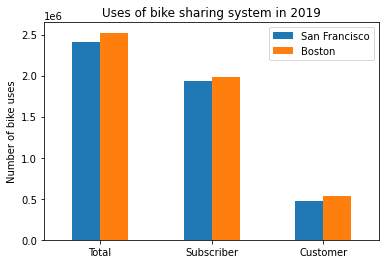

In [40]:
# Plot clustered bar chart for usage of bikes
comp_user_types.set_index('index').plot(kind='bar')
plt.title('Uses of bike sharing system in 2019')
plt.xlabel('')
plt.ylabel('Number of bike uses')
plt.xticks(rotation= 0);

Within the graph which shows the number of bike uses in 2019 in total and assigned to the customer types only there are only small differences between the San Francisco and Boston dataset. For both bike sharing systems the number of uses by subscribers (short term access) is considerably higher (around 1,900,000) than the number of customer uses (around 500,000). However as we are regarding the absolute values for uses following we are also going to compare the proportional values for subscriber and customer uses.

In [41]:
# Preparing data for plot with percentage values for 'subscriber' and customer
# Remove column 'index'
comp_user_types.drop(['index'], axis=1, inplace=True)

# Transpose comp_user_types
comp_user_types = comp_user_types.transpose()

# Calculating percentages
comp_user_types['Subsciber_perc'] = comp_user_types['Subscriber']/comp_user_types['Total']
comp_user_types['Customer_perc'] = comp_user_types['Customer']/comp_user_types['Total']

# Remove columns 'total', 'customer' and 'subscriber'
comp_user_types.drop(['Total','Subscriber','Customer'], axis=1, inplace=True)

# Rename columns
column_labels = ['Subscriber', 'Customer']
comp_user_types.columns = column_labels

# Transpose comp_user_types
comp_user_types = comp_user_types.transpose()

# Creating column 'index' with index labels
comp_user_types['index'] = comp_user_types.index

In [42]:
#Checking dataframe before plotting
comp_user_types

,San Francisco,Boston,index
Subscriber,0.803836,0.788281,Subscriber
Customer,0.196164,0.211719,Customer


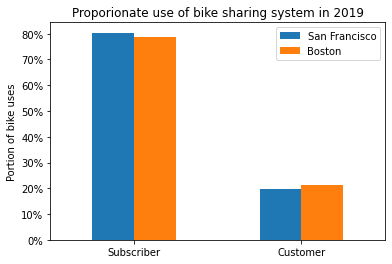

In [43]:
# Plot clustered bar chart for proportionate use of bikes
ax = comp_user_types.set_index('index').plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Proporionate use of bike sharing system in 2019')
plt.xlabel('')
plt.ylabel('Portion of bike uses')
plt.xticks(rotation= 0);

As the comparison of the absolute values also the graph with the proportional uses shows similarities between the San Francisco and Boston dataset for the year 2019. The fact that the portion of subscribers for both datasets is way higher than the portion of customers could be partially explained by the fact that for both cities tourism is an important economic factor. Tourists are usually staying only a short time and are more likely than residents to use the bike sharing system as a subscriber (short term) than as a customer.

### VI. Exploration of further characteristics

In [44]:
# Calculating the number of bikes in use
num_bikes_sf = df_clean.bike_id.nunique()
num_bikes_bo = df2_clean.bike_id.nunique()

In [45]:
# Calculating how often a bike gets used in average
mean_utilization_sf = df_clean.user_type.count()/num_bikes_sf
mean_utilization_bo = df2_clean.user_type.count()/num_bikes_bo

In [46]:
# Calculating utilization time per bike
mean_bike_usage_sf = df_clean.groupby('bike_id').duration_sec.sum().mean()
mean_bike_usage_bo = df2_clean.groupby('bike_id').duration_sec.sum().mean()

In [47]:
# Calculating the capacity utilization level
seconds_per_year = 365*24*60*60

capacity_util_sf = mean_bike_usage_sf/seconds_per_year
capacity_util_bo = mean_bike_usage_bo/seconds_per_year

In [48]:
# Creating dataframe for visualization puroposes
# Creating lists with calculated data
data_sf = [num_bikes_sf, mean_utilization_sf, mean_bike_usage_sf, capacity_util_sf]
data_bo = [num_bikes_bo, mean_utilization_bo, mean_bike_usage_bo, capacity_util_bo]

# Creating new datafrane
bike_utilization = pd.DataFrame()

# Adding calculated data to dataframe
bike_utilization['San Francisco'] = data_sf
bike_utilization['Boston'] = data_bo

# Adding index to dataframe
bike_utilization['index'] = ['', '', '', '']

In [49]:
# Checking dataframe before plotting
bike_utilization

,San Francisco,Boston,index
0,10766.000000,4652.000000,
1,223.598272,542.247850,
2,179955.718187,798098.581900,
3,0.005706,0.025308,


In [50]:
# Splitting bike_utilization into single dataframes to facilitate plot creation
number_of_bikes = bike_utilization[0:1].copy()
mean_uses_per_bike = bike_utilization[1:2].copy()
capacity_utilization_per_bike = bike_utilization[3:4].copy()

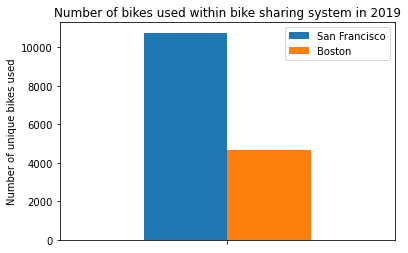

In [51]:
# Plot graph for number of bikes used
number_of_bikes.set_index('index').plot(kind='bar')
plt.title('Number of bikes used within bike sharing system in 2019')
plt.xlabel('')
plt.ylabel('Number of unique bikes used')
plt.xticks(rotation= 0);

The graph shows the number of different bikes which have been used within the bike sharing system in San Francisco and Boston in 2019. The number of bikes which have been used in San Francisco with 10,766 is more than twice as high as the number of bikes used in Boston (4,652).

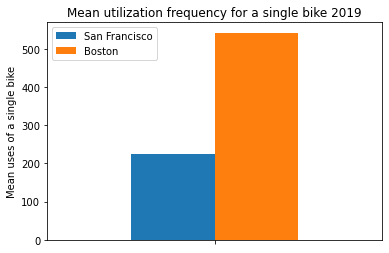

In [52]:
# Plot graph for utilization frequency
mean_uses_per_bike.set_index('index').plot(kind='bar')
plt.title('Mean utilization frequency for a single bike 2019')
plt.xlabel('')
plt.ylabel('Mean uses of a single bike')
plt.xticks(rotation= 0);

As we saw in the graph before, the number of bikes used in the Boston area is only half of the number of bikes in San Francisco. Accordingly bikes in Boston in average got used way more frequently (about 542 times) than bikes in San Francisco (about 224 times) in 2019.

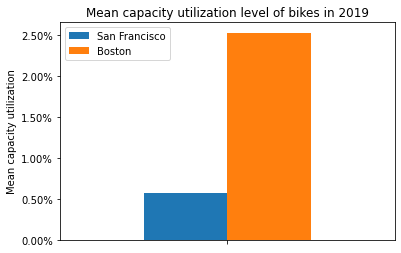

In [53]:
# Plot graph for capacity utilization levels
ax = capacity_utilization_per_bike.set_index('index').plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Mean capacity utilization level of bikes in 2019')
plt.xlabel('')
plt.ylabel('Mean capacity utilization')
plt.xticks(rotation= 0);

This graph shows the mean capacity utilization levels for the two datasets within the year 2019 and summarizes the two graphs we saw before. Mean capacity utilization signifies the mean time a bike is actually used within the year divided by the time the bicycle has theoretically been available throughout the year. The Boston bike sharing system shows a mean capacity utilization level of about 2.5 percent whilst San Francisco only shows a level of 0.5 percent.

As way less bicycles been used in the Boston dataset throughout the year, the total number of uses has been slightly in Boston than in San Francisco and the mean usage duration has been higher, we expected the bike utilization level in Boston to be significantly higher than in San Francisco.

### VII. Were there any surprising features?
I deducted the most interesting insights from the graph which compared the bike uses throughout the months of the year 2019 for San Francisco and Boston. When I compared the graphs with mean temperature graphs for the two cities from the internet, the similarities of the graphs were astonishing. Obviously there is a strong possitive correlation between the use of rental bikes and the temperature respectively general weather conditions.
From an economic point of view also the fact that the bike sharing system in Boston apparently only provides half the number of rental bikes whilst achieving a similar number of uses throughout the year 2019 was surprising.